In [1]:
import Topic_modeling
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams["figure.figsize"]=20,20

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
everything = Topic_modeling.Topic_modeling('Excels/everything.xls', 'everything')
adv_disav_def = Topic_modeling.Topic_modeling('Excels/adv_disav_def.xls', 'adv_disav_def')
ansible = Topic_modeling.Topic_modeling('Excels/ansible.xls', 'ansible')
bad_practices = Topic_modeling.Topic_modeling('Excels/bad_practices.xls', 'bad_practices')
best_practices = Topic_modeling.Topic_modeling('Excels/best_practices.xls', 'best_practices')
chef = Topic_modeling.Topic_modeling('Excels/chef.xls', 'chef')
puppet = Topic_modeling.Topic_modeling('Excels/puppet.xls', 'puppet')

In [35]:
data_lemmatized = ansible.data_lemmatized

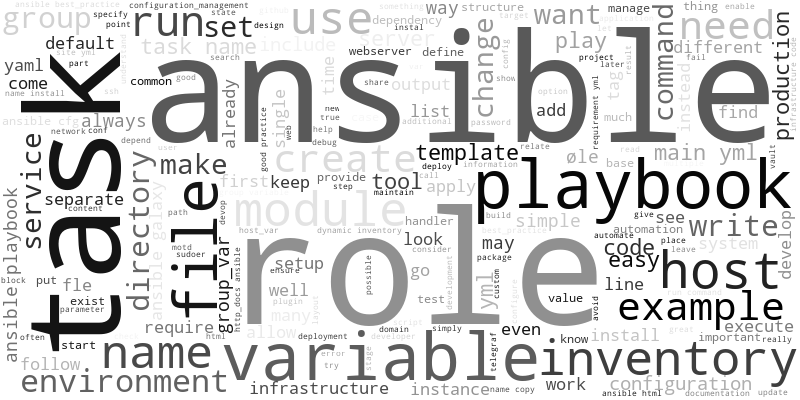

In [36]:
# Join the different processed texts together.
long_string = ','.join([','.join(text) for text in data_lemmatized])

wordcloud = WordCloud(background_color="white", contour_width=3,colormap='binary',width=800, height=400)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [37]:
from collections import Counter
wordcount = Counter(long_string.split(','))
sorted_wordcount = sorted(list(wordcount.items()), key=lambda x: x[1],reverse=True)
sorted_wordcount[:10]

[('ansible', 375),
 ('role', 250),
 ('task', 201),
 ('playbook', 190),
 ('variable', 178),
 ('name', 156),
 ('file', 141),
 ('yml', 122),
 ('inventory', 107),
 ('host', 97)]

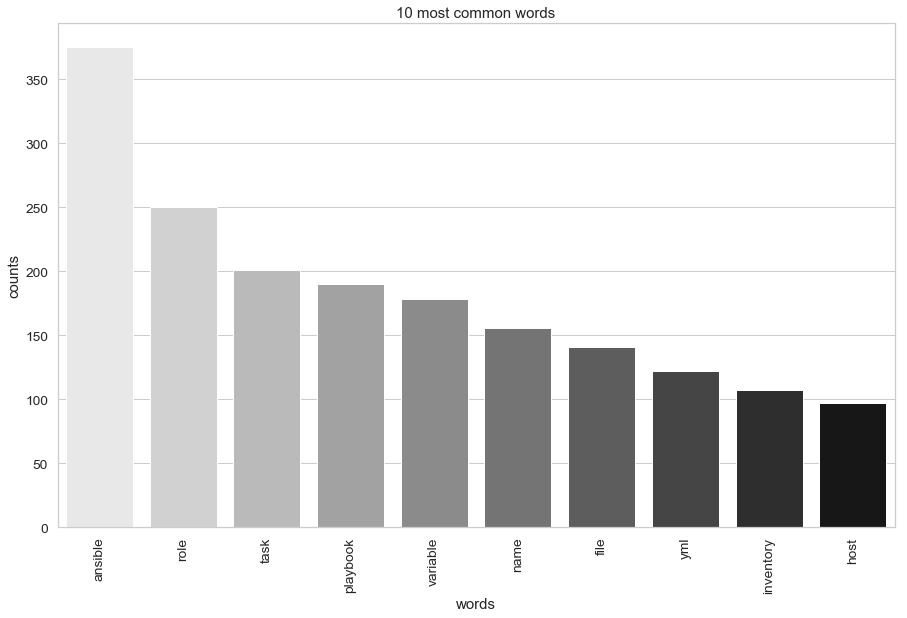

In [38]:
sns.set_style('whitegrid')

%matplotlib inline
# Helper function
def plot_10_most_common_words(data):
    import matplotlib.pyplot as plt
    words = [w[0] for w in data[0:10]]
    counts = [w[1] for w in data[0:10]]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='binary')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Visualise the 10 most common words
plot_10_most_common_words(sorted_wordcount)